<a href="https://colab.research.google.com/github/RayGone/DeepWeeds/blob/main/DeepWeeds_CNN_Arc1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import shutil

In [2]:
## Downloading DeepWeeds Data  ## For Google Colab
url = 'https://drive.google.com/uc?export=download&id=1xnK3B6K6KekDI55vwJ0vnc2IGoDga9cj'
!gdown 1xnK3B6K6KekDI55vwJ0vnc2IGoDga9cj
!unzip -qq images.zip -d images

Downloading...
From (original): https://drive.google.com/uc?id=1xnK3B6K6KekDI55vwJ0vnc2IGoDga9cj
From (redirected): https://drive.google.com/uc?id=1xnK3B6K6KekDI55vwJ0vnc2IGoDga9cj&confirm=t&uuid=58ddc2cd-5b6a-4feb-92d2-f5067e7d6b09
To: /content/images.zip
100% 492M/492M [00:06<00:00, 70.6MB/s]


In [3]:
data_info = pd.read_csv('https://raw.githubusercontent.com/AlexOlsen/DeepWeeds/master/labels/labels.csv') ## for GoogleColab
# data_info = pd.read_csv("/kaggle/input/deepweeds/labels.csv") ## For Kaggle
# shuffle the DataFrame rows
data_info = data_info.sample(frac = 1)
print(data_info.shape)
data_info.head(5)

(17509, 3)


,Filename,Label,Species
14149,20180112-075315-2.jpg,8,Negative
14406,20180112-083102-1.jpg,8,Negative
5747,20170920-171241-3.jpg,2,Parkinsonia
3768,20170728-123508-3.jpg,4,Prickly acacia
14310,20180112-081449-2.jpg,8,Negative


In [4]:
data_info[['Species','Label']].groupby(by='Species').count().T

Species,Chinee apple,Lantana,Negative,Parkinsonia,Parthenium,Prickly acacia,Rubber vine,Siam weed,Snake weed
Label,1125,1064,9106,1031,1022,1062,1009,1074,1016


## Splitting Data into Train:Valid:Test Splits (60:40:40)

In [5]:
# colabAI prompt: train test split using data_info
from sklearn.model_selection import train_test_split

# trax, tex, tray, tey = train_test_split(data_info['Filename'],data_info['Label'], test_size=0.4, random_state=99)
# train_data = pd.DataFrame({"Filename":trax,"label":tray})
train_data = pd.read_csv('https://raw.githubusercontent.com/AlexOlsen/DeepWeeds/master/labels/train_subset0.csv') ## for GoogleColab
train_data.rename(columns={"Label":"label"}, inplace=True)

# trax, tex, tray, tey = train_test_split(tex,tey, test_size=0.5, random_state=99)
# valid_data = pd.DataFrame({"Filename":trax,"label":tray})
# test_data = pd.DataFrame({"Filename":tex,"label":tey})
valid_data = pd.read_csv('https://raw.githubusercontent.com/AlexOlsen/DeepWeeds/master/labels/val_subset0.csv') ## for GoogleColab
valid_data.rename(columns={"Label":"label"}, inplace=True)
test_data = pd.read_csv('https://raw.githubusercontent.com/AlexOlsen/DeepWeeds/master/labels/test_subset0.csv') ## for GoogleColab
test_data.rename(columns={"Label":"label"}, inplace=True)

print("Is There Duplicates: ", not valid_data[valid_data['Filename'].isin(test_data['Filename'])].empty)
print("Train Data\n--------\n",train_data.groupby(by='label').count().T, "\tTotal:", train_data.shape)
print("Validation Data\n--------\n",valid_data.groupby(by='label').count().T, "\tTotal:", valid_data.shape)
print("Test Data\n--------\n",test_data.groupby(by='label').count().T, "\tTotal:", test_data.shape)

Is There Duplicates:  False
Train Data
--------
 label       0    1    2    3    4    5    6    7     8
Filename  675  637  618  613  637  605  644  609  5463 	Total: (10501, 2)
Validation Data
--------
 label       0    1    2    3    4    5    6    7     8
Filename  225  213  206  204  212  202  215  203  1821 	Total: (3501, 2)
Test Data
--------
 label       0    1    2    3    4    5    6    7     8
Filename  226  213  207  205  213  202  215  204  1822 	Total: (3507, 2)


## Creating Flow From Directory Dataset

In [6]:
import os
import shutil
from tqdm.auto import tqdm

oversampling = 1 # How many times are we gonna over sample
oversampling_labels = data_info[data_info['Species'] != "Negative"]['Label'].unique() ## labels to Oversample

def organize_data_to_directory(data_info,source_dir='',target_dir='',oversample=0,oversampling_labels=[]):
  for index, row in tqdm(data_info.iterrows()):
    filename = row['Filename']
    label = row['label']

    source = os.path.join(source_dir,filename)

    target_path = os.path.join(target_dir,str(label))
    target = os.path.join(target_path,filename)
    # print(source,target)

    if not os.path.exists(target_path):
        os.mkdir(target_path)

    if not os.path.exists(target):
        if oversample and (label in oversampling_labels):
            for i in range(oversample):
                sample_filename = os.path.join(target_path, "oversample-"+str(i)+"-"+filename)
                shutil.copy(source, sample_filename)

        shutil.copy(source,target)


base_dir = '/content/dataset' ## For GoogleColab
input_dir = '/content/images' ## For GoogleColab

# input_dir = "/kaggle/input/deepweeds/images" ## For Kaggle
# base_dir = "/kaggle/working/deepweeds" ## For Kaggle

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

## Organizing Training Data
organize_data_to_directory(train_data, source_dir=input_dir, target_dir=train_dir, oversample=oversampling, oversampling_labels=oversampling_labels)

# ## Organizing Validation Data
organize_data_to_directory(valid_data, source_dir=input_dir, target_dir=validation_dir)

# ## Organizing Test Data
organize_data_to_directory(test_data, source_dir=input_dir, target_dir=test_dir)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

IMG_SIZE = (256,256,3)
# --------------------
# Flow training images in batches using train_datagen generator
# --------------------
train_generator = image_dataset_from_directory(
    train_dir,
    batch_size=16,
    label_mode='categorical',
    image_size = IMG_SIZE[:2],
    shuffle=True,
)

# --------------------
# Flow validation images in batches using test_datagen generator
# --------------------
validation_generator =  image_dataset_from_directory(
    validation_dir,
    batch_size=8,
    label_mode='categorical',
    image_size = IMG_SIZE[:2],
    shuffle=False
)
# --------------------
# Flow test images in batches of 20 using test_datagen generator
# --------------------
test_generator =  image_dataset_from_directory(
    test_dir,
    batch_size=8,
    label_mode='categorical',
    image_size = IMG_SIZE[:2],
    shuffle=False
)

Found 15539 files belonging to 9 classes.
Found 3501 files belonging to 9 classes.
Found 3507 files belonging to 9 classes.


<ipython-input-8-bf211e50074e>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax[i][j].imshow(images[i+j*2].numpy().astype(np.int))


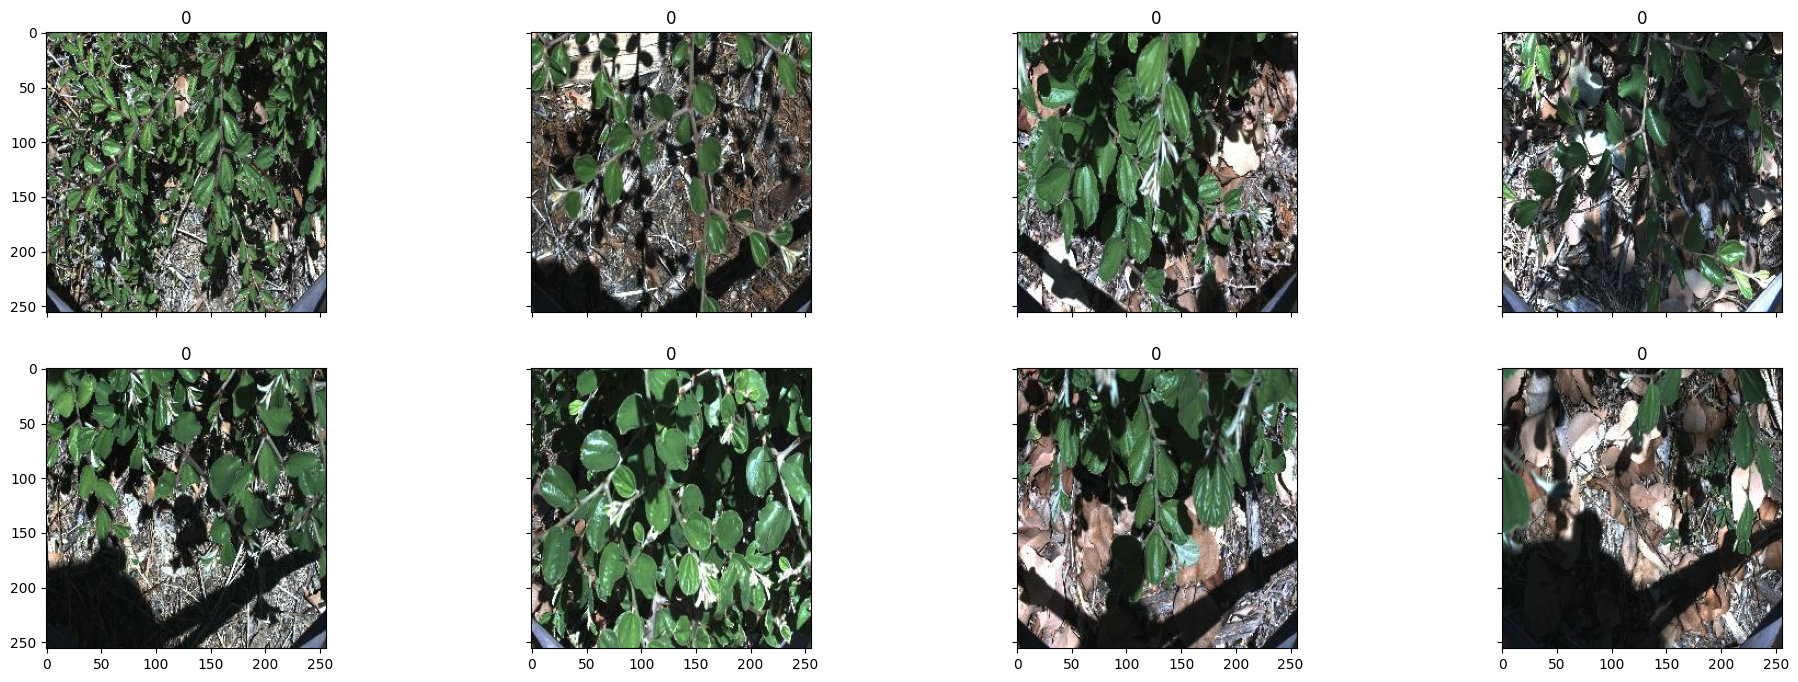

In [8]:
#image visualization
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(24,8))

for images, labels in validation_generator:
    for i in range(2):
        for j in range(4):
            ax[i][j].imshow(images[i+j*2].numpy().astype(np.int))
            ax[i][j].set_title(np.argmax(labels[i+j*2]))

    break
plt.show()

## Helper Functions

In [9]:
def getWeightedClass(data, power=1):
    total = data.shape[0]
    labels = data["Label"].unique()
    n_class= len(labels)

    class_weights = {}
    for label in labels:
        label_total = data[data['Label'] == label].shape[0]
        class_weights[label] = pow((1 / label_total) * (total / n_class),power)

    return class_weights

weights = getWeightedClass(data_info, 1/2)
weights

{8: 0.462216658561112,
 2: 1.3736626313179605,
 4: 1.3534654010190277,
 7: 1.3837657041780926,
 3: 1.3796977903175347,
 5: 1.3885573880346658,
 1: 1.3521927487385144,
 6: 1.3458829021356655,
 0: 1.3150224144923477}

In [10]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

## Defining Model

In [11]:
import tensorflow.keras.layers as layers
from tensorflow.keras import Sequential

model = Sequential([
        layers.Input(shape=IMG_SIZE),
        layers.Rescaling(1./255),
        layers.Resizing(224,224),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.Dropout(0.25),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(9, activation='softmax',name='output_layer')
    ], name='WCNN')

model.summary()

Model: "WCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 dropout (Dropout)           (None, 109, 109, 128)     0         
                                                              

Epoch 1/100
972/972 [==============================] - 104s 101ms/step - loss: 1.6249 - accuracy: 0.4527 - val_loss: 1.3095 - val_accuracy: 0.5650
Epoch 2/100
972/972 [==============================] - 100s 103ms/step - loss: 0.5984 - accuracy: 0.7964 - val_loss: 1.4739 - val_accuracy: 0.5010
Epoch 3/100
972/972 [==============================] - 99s 102ms/step - loss: 0.1388 - accuracy: 0.9503 - val_loss: 1.5833 - val_accuracy: 0.5424
Epoch 4/100
972/972 [==============================] - 100s 102ms/step - loss: 0.0523 - accuracy: 0.9842 - val_loss: 1.9447 - val_accuracy: 0.5547
Epoch 5/100
972/972 [==============================] - 101s 104ms/step - loss: 0.0461 - accuracy: 0.9855 - val_loss: 2.2945 - val_accuracy: 0.5464
Epoch 6/100
972/972 [==============================] - 94s 96ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 1.9837 - val_accuracy: 0.5421
Epoch 6: early stopping


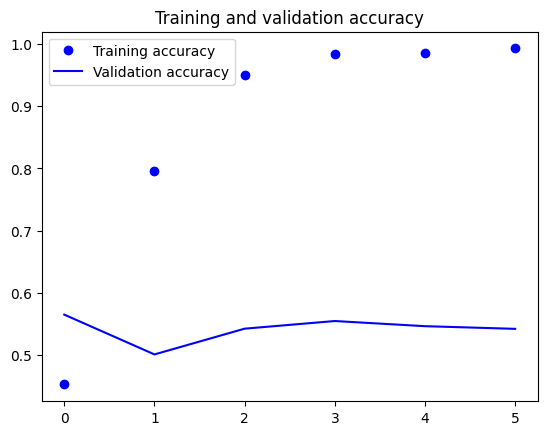

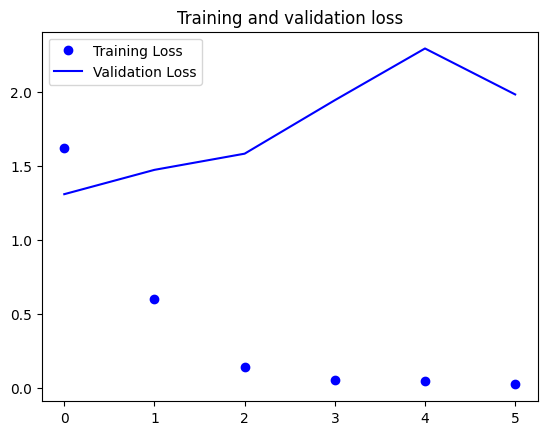

In [12]:
from tensorflow.keras.optimizers import RMSprop, AdamW, Adam, schedules

model.compile(loss='categorical_crossentropy',
          optimizer=AdamW(learning_rate=0.0002, weight_decay=0.001),
          metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1, restore_best_weights=True,)

# Constant for epochs
EPOCHS = 100

# Train the model
history = model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=validation_generator,
        callbacks=[callback],
        class_weight=weights
    )

model.save("checkpoint1")
# Plot training results
plot_loss_acc(history)

In [16]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

rand_guess = 0

def prediction_argmax(prediction):
    l_pred = np.argmax(prediction[:8])
    if(prediction[l_pred] > rand_guess):
        return l_pred

    return np.argmax(prediction)

def printStats(actual_labels,prediction, use_rand_guess= False):
    if use_rand_guess:
        prediction = [prediction_argmax(x) for x in prediction]
    else:
        prediction = [np.argmax(x) for x in prediction]

    print("Statistics")
    print("F1-Score",f1_score(actual_labels,prediction,average='weighted'))
    print("Precision-Score",precision_score(actual_labels,prediction,average='weighted'))
    print("Recall-Score",recall_score(actual_labels,prediction,average='weighted'))
    print("accuracy_Score",accuracy_score(actual_labels,prediction))
    print()

    cmd = ConfusionMatrixDisplay(tf.math.confusion_matrix(actual_labels,prediction,num_classes=9).numpy())
    cmd.plot()
    plt.show()

def eval_model(data, use_rand_guess=False):
    print("model.evaluate")
    model.evaluate(data)

    print("model.predict")
    actual_labels = [np.argmax(z) for z in np.concatenate([y for x, y in test_generator], axis=0)]
    pred_prob = model.predict(test_generator)

    printStats(actual_labels,pred_prob,use_rand_guess)
    return actual_labels, pred_prob


In [19]:
## Computing Random guess
a, b = eval_model(validation_generator)

thresholds = []
for i in range(len(a)):
    n_label = prediction_argmax(b[i])
    ap_label = np.argmax(b[i])
    a_label = a[i]

    if(n_label == a_label):
        thresholds.append(b[n_label])


rand_guess = np.mean(thresholds)
"Threshold = {}".format(rand_guess)

'Threshold = 0.1111111119389534'

Normal Evaluation   
--------------------------------------------------------------------
model.evaluate
439/439 [==============================] - 8s 18ms/step - loss: 1.3065 - accuracy: 0.5774
model.predict
439/439 [==============================] - 4s 8ms/step
Statistics
F1-Score 0.5408399747952612
Precision-Score 0.532365553408764
Recall-Score 0.5774165953806673
accuracy_Score 0.5774165953806673



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


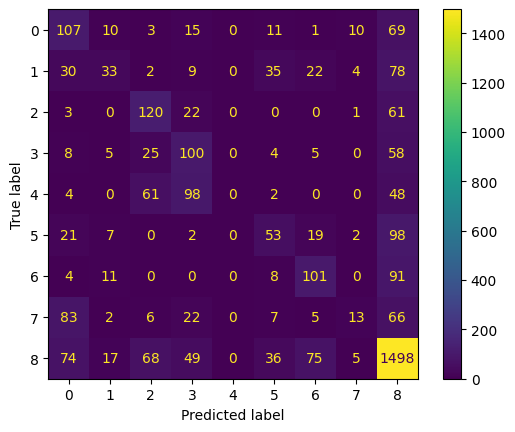



Evaluation with Random Guess - As applied by the paper DeepWeeds   
--------------------------------------------------------------------
Statistics
F1-Score 0.2873401246628889
Precision-Score 0.5680476647349542
Recall-Score 0.3088109495295124
accuracy_Score 0.3088109495295124



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


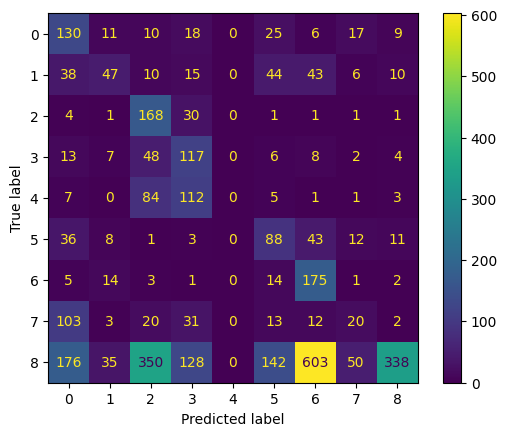

In [22]:
print("Normal Evaluation \
  \n--------------------------------------------------------------------")
a, b = eval_model(test_generator)
print("\n===============================================================\n")
print("Evaluation with Random Guess - As applied by the paper DeepWeeds \
  \n--------------------------------------------------------------------")
printStats(a,b,True)